# Formatos de archivos 

In [1]:
# Importamos las librerías utilizando un alias para cada una
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

## Shapefile
Importamos un archivo Shapefile con el mismo método visto en la Clase 1 `gpd.read_file`. Geopandas permite importar el formato Shapefile sin descomprimir

In [2]:
# Importamos el archivo "provincias" del directorio data
provincias = gpd.read_file("./data/provincias.shp")

In [3]:
provincias['geometry'].head()

0    POLYGON ((-58.45535 -34.52776, -58.45404 -34.5...
1    POLYGON ((-70.39341 -36.15624, -70.39333 -36.1...
2    POLYGON ((-67.05547 -31.85605, -67.05000 -31.8...
3    POLYGON ((-61.04639 -27.99800, -61.00805 -27.9...
4    MULTIPOLYGON (((-66.69852 -45.24747, -66.69920...
Name: geometry, dtype: geometry

<Axes: >

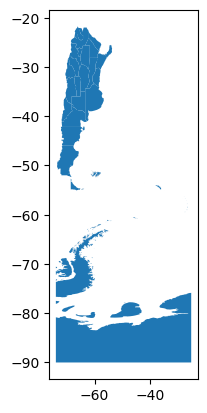

In [4]:
# Visualizamos rápidamente con el método plot()
provincias.plot()

## GeoJSON
Sin distinciones, utilizamos el método para incorporar archivos con formato GeoJSON.

In [5]:
# Importamos el archivo "provincias" del directorio data
ruta40 = gpd.read_file("./data/ruta_nacional_40.geojson")

<Axes: >

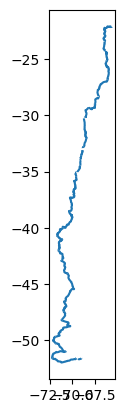

In [6]:
# Visualizamos rápidamente con el método plot()
ruta40.plot()

## CSV con coordenadas geográficas
Es muy común en sistemas informáticos NO geográficos el almacenamiento de pares de coordenadas en columnas. 
Geopandas permite transformar este tipo de archivos a un GeoDataFrame siguiendo estos pasos:

In [7]:
# 1 - Cargamos el archivo CSV en un DataFrame de Pandas
df = pd.read_csv("./data/establecimientos_educativos.csv")
df.head()

,entidad,fna,gna,nam,fdc,sag,longitud,latitud
0,NaN,NaN,NaN,NaN,NaN,NaN,-64.915516,-22.826571
1,NaN,NaN,NaN,NaN,NaN,NaN,-65.052115,-26.127273
2,NaN,NaN,NaN,NaN,NaN,NaN,-65.014158,-26.144138
3,NaN,NaN,NaN,NaN,NaN,NaN,-65.278967,-26.109316
4,NaN,NaN,NaN,NaN,NaN,NaN,-65.337127,-26.062460


In [8]:
# 2 - Crear un GeoDataFrame indicando que los puntos provinen con formato XY (longitud y latitud)
escuelas = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitud'], df['latitud']), crs="EPSG:4326")

<Axes: >

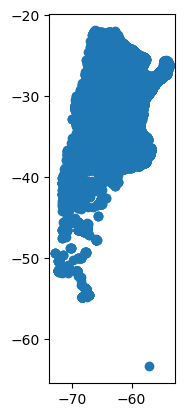

In [9]:
escuelas.plot()

## Visualización rápida de capas

<Axes: >

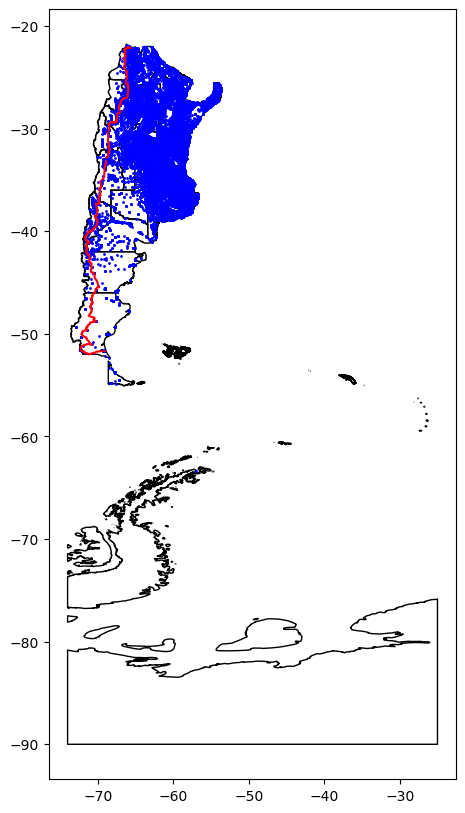

In [10]:
ax = provincias.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
ruta40.plot(ax=ax, color='red')
escuelas.plot(ax=ax, color='blue', markersize=1)

# Particularidades de la IG

## Escala
Simplificamos la Ruta 40 a distintas escalas y verificamos su longitud

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_4430/3136085028.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ruta40.plot(ax=ax, color='blue', label=f'Original: {round(ruta40.geometry.length[0])}')


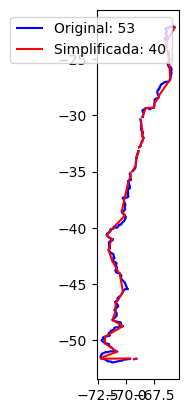

In [11]:
# Tomamos la geometría de la ruta 40
linea = ruta40.geometry.iloc[0]

# Realiza la simplificación de la línea. Puedes ajustar la tolerancia según tus necesidades.
tolerancia = 1  # Ajusta este valor según sea necesario
linea_simplificada = linea.simplify(tolerancia)

# Crea un nuevo GeoDataFrame solo con la línea simplificada
ruta40_simplificada = gpd.GeoDataFrame(geometry=[linea_simplificada])

# Ahora puedes visualizar y comparar la línea original y la simplificada
fig, ax = plt.subplots()
ruta40.plot(ax=ax, color='blue', label=f'Original: {round(ruta40.geometry.length[0])}')
ruta40_simplificada.plot(ax=ax, color='red', label=f'Simplificada: {round(ruta40_simplificada.geometry.length[0])}')
ax.legend()
plt.show()

## Unidad de área modificable
Crearemos 2 grillas regulares de tamaños o formas distintas y contaremos los centros educativos en cada celda.

In [12]:
# Cargamos ambas grillas
cuadrados = gpd.read_file("./data/cuadrados.gpkg")
hexagonos = gpd.read_file("./data/hexagonos.gpkg")

[(-71.0, -65.0), (-39.0, -31.0)]

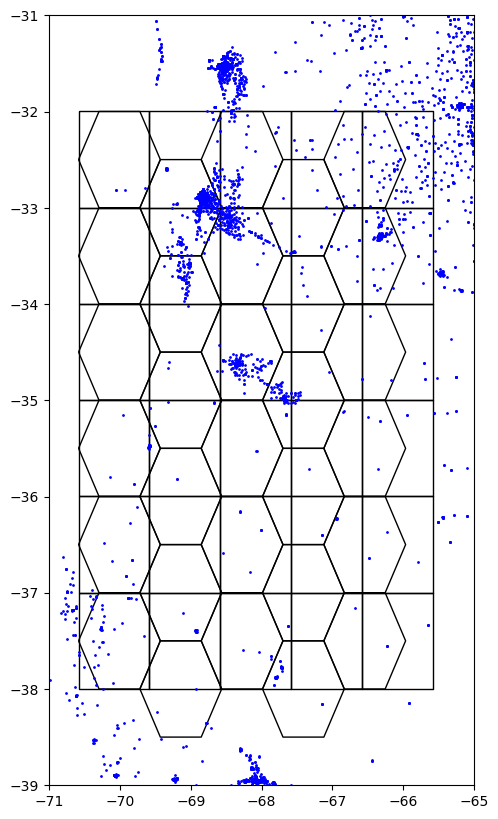

In [13]:
# Visualizamos los datos
ax = cuadrados.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
hexagonos.plot(ax=ax, edgecolor='k', facecolor='none')
escuelas.plot(ax=ax, color='blue', markersize=1)
ax.set(xlim=(-71, -65), ylim=(-39, -31))

### Contamos la cantidad de escuelas por hexágonos

/home/renzopolo/.var/app/org.jupyter.JupyterLab/config/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<Axes: >

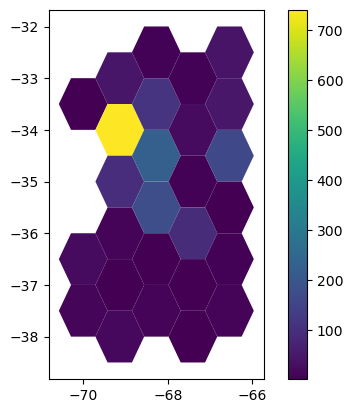

In [14]:
# Realizar una operación de intersección espacial (spatial join)
interseccion_puntos_hexagonos = gpd.sjoin(hexagonos, escuelas, op='contains')

# Contar la cantidad de puntos en cada hexágono
conteo_puntos_hexagonos = interseccion_puntos_hexagonos.groupby('id').size()

# Añadir el recuento como nueva columna al GeoDataFrame de la grilla de hexágonos
hexagonos['count_points'] = conteo_puntos_hexagonos

# Visualizar la grilla de hexágonos con el recuento de puntos
hexagonos.plot(column='count_points', cmap='viridis', legend=True)

### Contamos la cantidad de escuelas por cuadrado

/home/renzopolo/.var/app/org.jupyter.JupyterLab/config/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<Axes: >

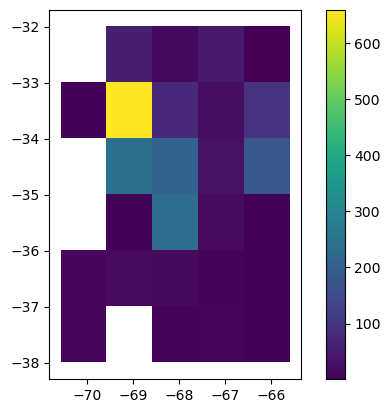

In [15]:
# Realizar una operación de intersección espacial (spatial join)
interseccion_puntos_cuadrado = gpd.sjoin(cuadrados, escuelas, op='contains')

# Contar la cantidad de puntos en cada hexágono
conteo_puntos_cuadrados = interseccion_puntos_cuadrado.groupby('id').size()

# Añadir el recuento como nueva columna al GeoDataFrame de la grilla de hexágonos
cuadrados['count_points'] = conteo_puntos_cuadrados

# Visualizar la grilla de hexágonos con el recuento de puntos
cuadrados.plot(column='count_points', cmap='viridis', legend=True)

In [16]:
prom_cuadrado = round(cuadrados['count_points'].mean())
print(f'Promedio escuelas cuadrados: {prom_cuadrado}')

prom_hexagonos = round(hexagonos['count_points'].mean())
print(f'Promedio escuelas hexagonos: {prom_hexagonos}')

Promedio escuelas cuadrados: 77
Promedio escuelas hexagonos: 70
